In [ ]:
import numpy as nan
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
headers = {
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
    }
webpage=requests.get('https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating',headers=headers).text

In [ ]:
soup=BeautifulSoup(webpage,'lxml')

In [ ]:
names = []
years = []
time=[]
imdb_ratings = []
metascores = []
votes = []
gross= []

In [ ]:
movies_data = soup.findAll('div',attrs={'class':'lister-item-content'})
len(movies_data)

100

In [ ]:
for store in movies_data:
    name=store.h3.a.text
    names.append(name)
    release=store.h3.find('span',class_='lister-item-year text-muted unbold').text.replace(')','').replace('(','')
    years.append(release)
    runtime=store.p.find('span',class_='runtime').text
    time.append(runtime)
    rating=store.find('div',class_='inline-block ratings-imdb-rating').text.replace('\n','')
    imdb_ratings.append(rating)
    m_score = store.find('span', class_='metascore').text if store.find('span', class_='metascore') else '-'
    metascores.append(m_score)
    value=store.find_all('span',attrs={'name':'nv'})
    vote=value[0].text
    votes.append(vote)
    grosses =value[1].text if len(value) > 1 else '-'
    gross.append(grosses)
    

In [ ]:
d={'names':names,'years':years,'time':time,'imdb_ratings':imdb_ratings,'metascores':metascores,'votes':votes,'gross':gross}
df=pd.DataFrame(d)
df

,names,years,time,imdb_ratings,metascores,votes,gross
0,The Shawshank Redemption,1994,142 min,9.3,81,"2,639,526",$28.34M
1,The Godfather,1972,175 min,9.2,100,"1,829,607",$134.97M
2,Rocketry: The Nambi Effect,2022,157 min,9.0,-,"44,021",-
3,The Dark Knight,2008,152 min,9.0,84,"2,611,126",$534.86M
4,The Lord of the Rings: The Return of the King,2003,201 min,9.0,94,"1,815,121",$377.85M
...,...,...,...,...,...,...,...
95,Hamilton,2020,160 min,8.3,90,"92,101",#117
96,Raatchasan,2018,170 min,8.3,-,"42,862",-
97,Ayla: The Daughter of War,2017,125 min,8.3,-,"39,631",-
98,Vikram Vedha,2017,147 min,8.3,-,"41,282",-


In [ ]:
df.head(30)

,names,years,time,imdb_ratings,metascores,votes,gross
0,The Shawshank Redemption,1994,142 min,9.3,81,"2,639,526",$28.34M
1,The Godfather,1972,175 min,9.2,100,"1,829,607",$134.97M
2,Rocketry: The Nambi Effect,2022,157 min,9.0,-,"44,021",-
3,The Dark Knight,2008,152 min,9.0,84,"2,611,126",$534.86M
4,The Lord of the Rings: The Return of the King,2003,201 min,9.0,94,"1,815,121",$377.85M
5,Schindler's List,1993,195 min,9.0,94,"1,338,356",$96.90M
6,The Godfather Part II,1974,202 min,9.0,90,"1,254,413",$57.30M
7,12 Angry Men,1957,96 min,9.0,96,"779,296",$4.36M
8,Jai Bhim,2021,164 min,8.9,-,"197,770",#237
9,Pulp Fiction,1994,154 min,8.9,94,"2,020,015",$107.93M


In [ ]:
df.dtypes

names           object
years           object
time            object
imdb_ratings    object
metascores      object
votes           object
gross           object
dtype: object

In [ ]:
df['time'] = df['time'].str.extract('(\d+)').astype(int)
df.head(13)

,names,years,time,imdb_ratings,metascores,votes,gross
0,The Shawshank Redemption,1994,142,9.3,81,"2,639,526",$28.34M
1,The Godfather,1972,175,9.2,100,"1,829,607",$134.97M
2,Rocketry: The Nambi Effect,2022,157,9.0,-,"44,021",-
3,The Dark Knight,2008,152,9.0,84,"2,611,126",$534.86M
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94,"1,815,121",$377.85M
5,Schindler's List,1993,195,9.0,94,"1,338,356",$96.90M
6,The Godfather Part II,1974,202,9.0,90,"1,254,413",$57.30M
7,12 Angry Men,1957,96,9.0,96,"779,296",$4.36M
8,Jai Bhim,2021,164,8.9,-,"197,770",#237
9,Pulp Fiction,1994,154,8.9,94,"2,020,015",$107.93M


In [ ]:
df.head(15)

,names,years,time,imdb_ratings,metascores,votes,gross
0,The Shawshank Redemption,1994,142,9.3,81,"2,639,526",$28.34M
1,The Godfather,1972,175,9.2,100,"1,829,607",$134.97M
2,Rocketry: The Nambi Effect,2022,157,9.0,-,"44,021",-
3,The Dark Knight,2008,152,9.0,84,"2,611,126",$534.86M
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94,"1,815,121",$377.85M
5,Schindler's List,1993,195,9.0,94,"1,338,356",$96.90M
6,The Godfather Part II,1974,202,9.0,90,"1,254,413",$57.30M
7,12 Angry Men,1957,96,9.0,96,"779,296",$4.36M
8,Jai Bhim,2021,164,8.9,-,"197,770",#237
9,Pulp Fiction,1994,154,8.9,94,"2,020,015",$107.93M


In [ ]:
df['votes'] = df['votes'].str.replace(',', '').astype(int)
df.head(3)

,names,years,time,imdb_ratings,metascores,votes,gross
0,The Shawshank Redemption,1994,142,9.3,81,2639526,$28.34M
1,The Godfather,1972,175,9.2,100,1829607,$134.97M
2,Rocketry: The Nambi Effect,2022,157,9.0,-,44021,-


In [ ]:
df['gross'] =df['gross'].map(lambda x: x.lstrip('$').rstrip('M'))
# convert it to float and if there are dashes turn it into NaN
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df.head(3)

,names,years,time,imdb_ratings,metascores,votes,gross
0,The Shawshank Redemption,1994,142,9.3,81,2639526,28.34
1,The Godfather,1972,175,9.2,100,1829607,134.97
2,Rocketry: The Nambi Effect,2022,157,9.0,-,44021,NaN


In [ ]:
df.dtypes

names            object
years            object
time              int64
imdb_ratings     object
metascores       object
votes             int64
gross           float64
dtype: object

In [ ]:
df

,names,years,time,imdb_ratings,metascores,votes,gross
0,The Shawshank Redemption,1994,142,9.3,81,2639526,28.34
1,The Godfather,1972,175,9.2,100,1829607,134.97
2,Rocketry: The Nambi Effect,2022,157,9.0,-,44021,NaN
3,The Dark Knight,2008,152,9.0,84,2611126,534.86
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94,1815121,377.85
...,...,...,...,...,...,...,...
95,Hamilton,2020,160,8.3,90,92101,NaN
96,Raatchasan,2018,170,8.3,-,42862,NaN
97,Ayla: The Daughter of War,2017,125,8.3,-,39631,NaN
98,Vikram Vedha,2017,147,8.3,-,41282,NaN


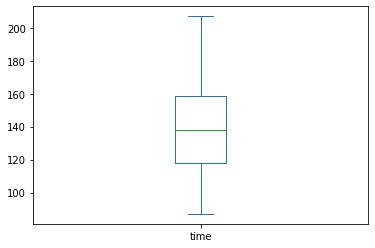

In [ ]:
df.time.plot(kind='box')
plt.show()

In [ ]:
df.corr()

,time,votes,gross
time,1.000000,0.169282,0.236694
votes,0.169282,1.000000,0.487010
gross,0.236694,0.487010,1.000000


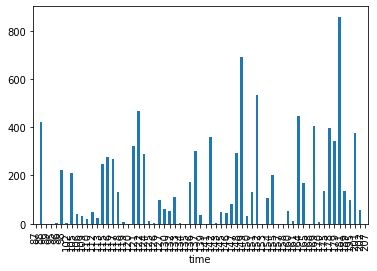

In [ ]:
df.groupby('time').gross.sum().plot(kind='bar')
plt.show()

In [ ]:
df_gross = df.groupby('names')['gross'].sum()
df_gross.sort_values(ascending=False).head(20)

names
Avengers: Endgame                                    858.37
Avengers: Infinity War                               678.82
The Dark Knight                                      534.86
The Dark Knight Rises                                448.14
The Lion King                                        422.78
The Lord of the Rings: The Return of the King        377.85
The Lord of the Rings: The Two Towers                342.55
Joker                                                335.45
Forrest Gump                                         330.25
Star Wars                                            322.74
The Lord of the Rings: The Fellowship of the Ring    315.54
Inception                                            292.58
Star Wars: Episode V - The Empire Strikes Back       290.48
Indiana Jones and the Raiders of the Lost Ark        248.16
WALL·E                                               223.81
Saving Private Ryan                                  216.54
Back to the Future                

In [ ]:
df_groupby_ratings = df.groupby(['imdb_ratings'])['names'].count()

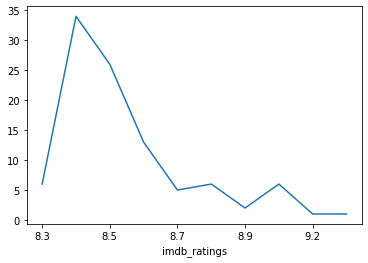

In [ ]:
df_groupby_ratings.plot()

In [ ]:
df_movies_year = df.groupby(['years'])['names'].count()
df_movies_year.head()

years
1931    1
1936    1
1940    1
1942    1
1946    1
Name: names, dtype: int64

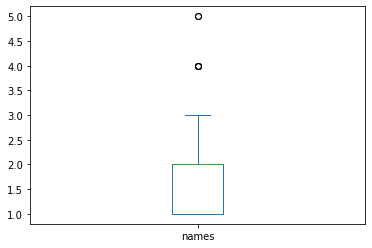

In [ ]:
df_movies_year.plot(kind='box')

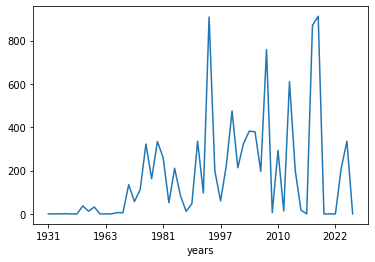

In [ ]:
df_movies_year_gross = df.groupby(['years'])['gross'].sum()
df_movies_year_gross.plot()


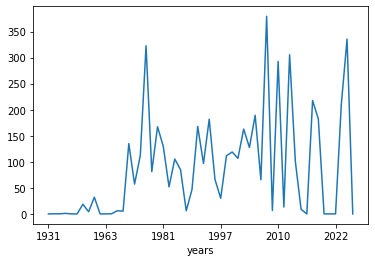

In [ ]:
turnover_per_movie_year = df_movies_year_gross / df_movies_year
turnover_per_movie_year.plot()

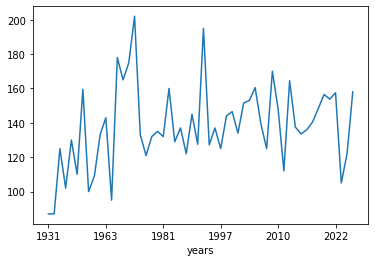

In [ ]:
df_movies_year_duration = df.groupby(['years'])['time'].sum()
df_movies_year_avg_duration = df_movies_year_duration / df_movies_year
df_movies_year_avg_duration.plot()